**DSCI 100 PLAICraft Group Project**

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(lubridate)
library(dplyr)
library(themis)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
set.seed(1)

In [3]:
url_players <- "https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz"
url_sessions <- "https://drive.google.com/uc?export=download&id=14O91N5OlVkvdGxXNJUj5jIsV5RexhzbB"

In [4]:
players_data <- read_csv(url_players)
players_data

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,NA,NA
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,NA,NA
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,NA,NA
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,NA,NA
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,NA,NA
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19,NA,NA
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21,NA,NA
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17,NA,NA


In [5]:
players <- players_data |>
        select(experience, played_hours, gender, age, hashedEmail) |>
        mutate(experience = as_factor(experience), gender = as_factor(gender)) |>
        mutate(much_time = played_hours >= 3)
players

experience,played_hours,gender,age,hashedEmail,much_time
<fct>,<dbl>,<fct>,<dbl>,<chr>,<lgl>
Pro,30.3,Male,9,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,TRUE
Veteran,3.8,Male,17,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,TRUE
Veteran,0.0,Male,17,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,FALSE
Amateur,0.7,Female,21,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,FALSE
Regular,0.1,Male,21,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,FALSE
Amateur,0.0,Female,17,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,FALSE
Regular,0.0,Female,19,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,FALSE
Amateur,0.0,Male,21,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,FALSE
Amateur,0.1,Male,17,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,FALSE


In [6]:
sessions_data <- read_csv(url_sessions)
sessions_data

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15/04/2024 07:12,15/04/2024 07:21,1.71317e+12,1.71317e+12
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21/09/2024 02:13,21/09/2024 02:30,1.72688e+12,1.72689e+12
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21/06/2024 02:31,21/06/2024 02:49,1.71894e+12,1.71894e+12


In [7]:
sessions_tidy <- sessions_data |>
        mutate(start_date = dmy_hm(start_time), end_date = dmy_hm(end_time)) |>
        mutate(session_length = end_date - start_date) |>
        select(-start_time, -end_time) |>
        separate(start_date, into = c("start_date", "start_time"), sep = " ") |>
        separate(end_date, into = c("end_date", "end_time"), sep = " ") |>
        rename(unix_start_time = original_start_time, unix_end_time = original_end_time)
sessions_tidy

Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 3 rows [106, 1221, 1222].”
Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 4 rows [52, 1063, 1066,
1238].”


hashedEmail,unix_start_time,unix_end_time,start_date,start_time,end_date,end_time,session_length
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<drtn>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,1.71977e+12,1.71977e+12,2024-06-30,18:12:00,2024-06-30,18:24:00,12 mins
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,1.71867e+12,1.71867e+12,2024-06-17,23:33:00,2024-06-17,23:46:00,13 mins
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,1.72193e+12,1.72193e+12,2024-07-25,17:34:00,2024-07-25,17:57:00,23 mins
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,1.72188e+12,1.72188e+12,2024-07-25,03:22:00,2024-07-25,03:58:00,36 mins
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,1.71665e+12,1.71665e+12,2024-05-25,16:01:00,2024-05-25,16:12:00,11 mins
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,1.71916e+12,1.71916e+12,2024-06-23,15:08:00,2024-06-23,17:10:00,122 mins
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,1.71317e+12,1.71317e+12,2024-04-15,07:12:00,2024-04-15,07:21:00,9 mins
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,1.72688e+12,1.72689e+12,2024-09-21,02:13:00,2024-09-21,02:30:00,17 mins
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,1.71894e+12,1.71894e+12,2024-06-21,02:31:00,2024-06-21,02:49:00,18 mins


In [8]:
sessions <- sessions_tidy |>
        group_by(hashedEmail) |>
        summarize(session_amount = n())
sessions

hashedEmail,session_amount
<chr>,<int>
0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,2
060aca80f8cfbf1c91553a72f4d5ec8034764b05ab59fe8e1cf0eee9a7b67967,1
0ce7bfa910d47fc91f21a7b3acd8f33bde6db57912ce0290fa0437ce0b97f387,1
0d4d71be33e2bc7266ee4983002bd930f69d304288a8663529c875f40f1750f3,13
0d70dd9cac34d646c810b1846fe6a85b9e288a76f5dcab9c1ff1a0e7ca200b3a,2
11006065e9412650e99eea4a4aaaf0399bc338006f85e80cc82d18b49f0e2aa4,1
119f01b9877fc5ea0073d05602a353b91c4b48e4cf02f42bb8d661b46a34b760,1
18936844e06b6c7871dce06384e2d142dd86756941641ef39cf40a9967ea14e3,41
1a2b92f18f36b0b59b41d648d10a9b8b20a2adff550ddbcb8cec2f47d4d881d0,1


In [9]:
plaicraft <- players |>
        filter(experience != "NA") |>
        mutate(much_time_ = as_factor(much_time)) |>
        select(-much_time)
plaicraft

experience,played_hours,gender,age,hashedEmail,much_time_
<fct>,<dbl>,<fct>,<dbl>,<chr>,<fct>
Pro,30.3,Male,9,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,TRUE
Veteran,3.8,Male,17,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,TRUE
Veteran,0.0,Male,17,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,FALSE
Amateur,0.7,Female,21,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,FALSE
Regular,0.1,Male,21,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,FALSE
Amateur,0.0,Female,17,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,FALSE
Regular,0.0,Female,19,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,FALSE
Amateur,0.0,Male,21,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,FALSE
Amateur,0.1,Male,17,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,FALSE


Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_count()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


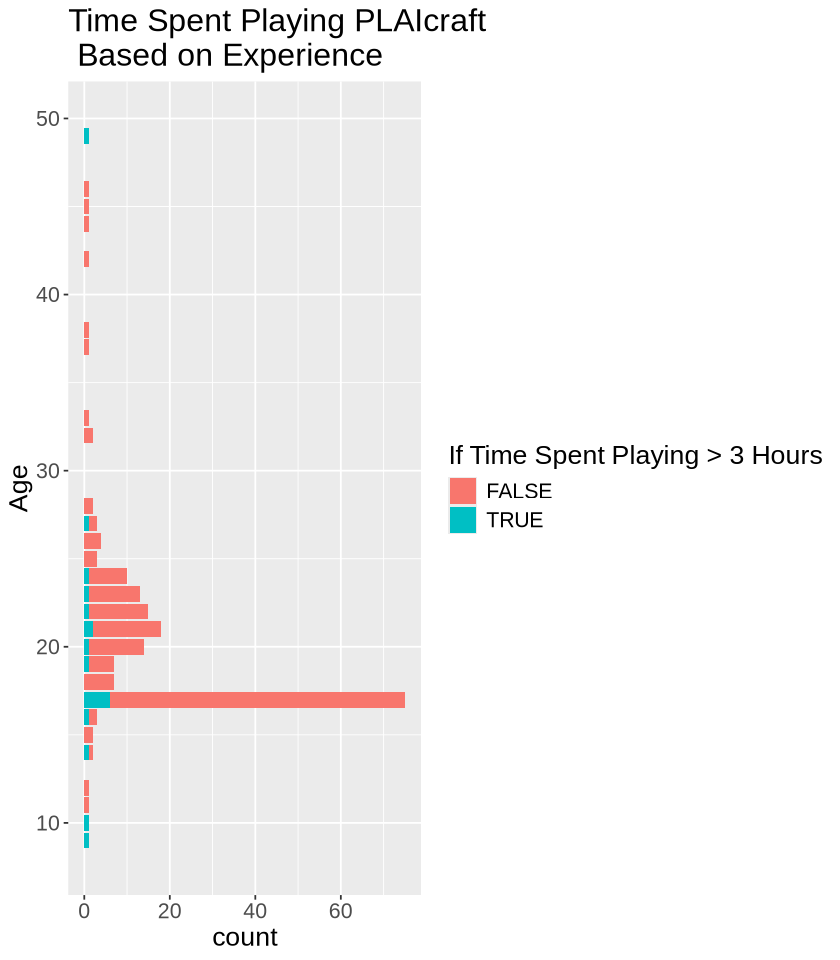

In [10]:
options(repr.plot.with = 10, repr.plot.height = 8)
players_age_plot <- plaicraft |>
        ggplot(aes(y = age, fill = much_time_)) +
        geom_bar(stat = "count") +
        labs(y = "Age", title = "Time Spent Playing PLAIcraft \n Based on Experience", 
             fill = "If Time Spent Playing > 3 Hours") +
        ylim(c(8,50)) +
        theme(text = element_text(size = 16))
players_age_plot

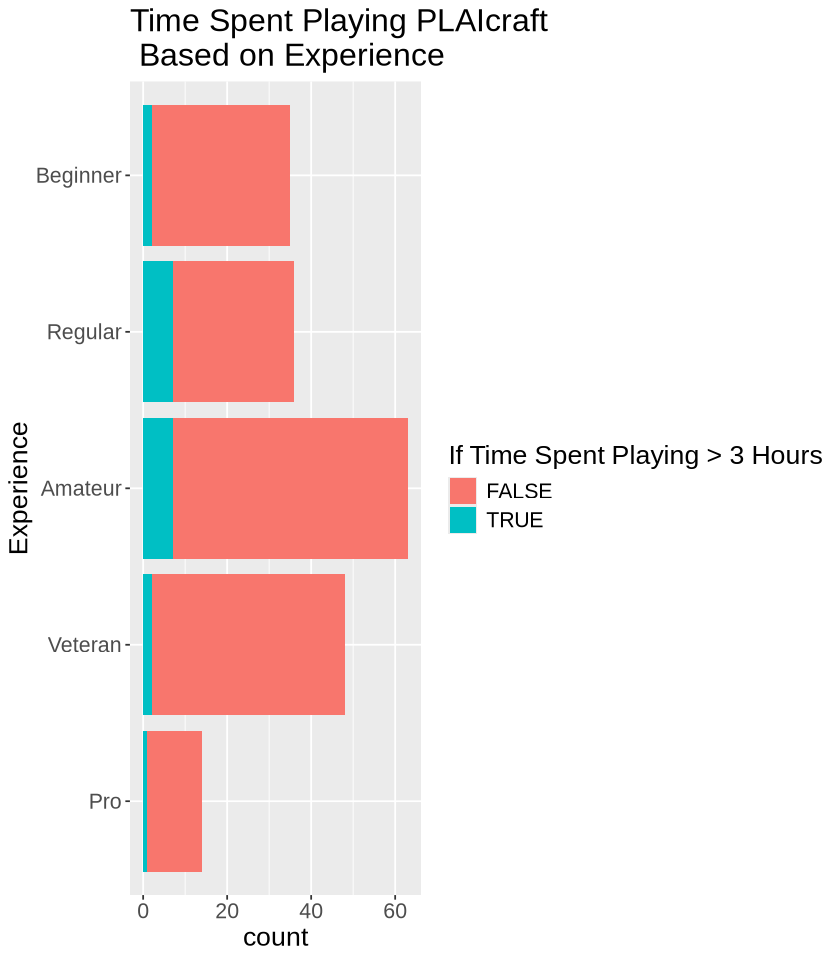

In [11]:
options(repr.plot.with = 10, repr.plot.height = 8)
players_time_plot <- plaicraft |>
        ggplot(aes(y = experience, fill = much_time_)) +
        geom_bar(stat = "count") +
        labs(y = "Experience", title = "Time Spent Playing PLAIcraft \n Based on Experience", 
             fill = "If Time Spent Playing > 3 Hours") +
        theme(text = element_text(size = 16))
players_time_plot

In [12]:
count <- plaicraft |>
    group_by(experience) |>
    summarize(count = n()) |>
    arrange(count)
count

counts <- players_data |>
    group_by(experience) |>
    summarize(count = n()) |>
    arrange(count)
counts

experience,count
<fct>,<int>
Pro,14
Beginner,35
Regular,36
Veteran,48
Amateur,63


experience,count
<chr>,<int>
Pro,14
Beginner,35
Regular,36
Veteran,48
Amateur,63


→ A | warning: No control observations were detected in `truth` with control level 'TRUE'.

There were issues with some computations   A: x1

There were issues with some computations   A: x1





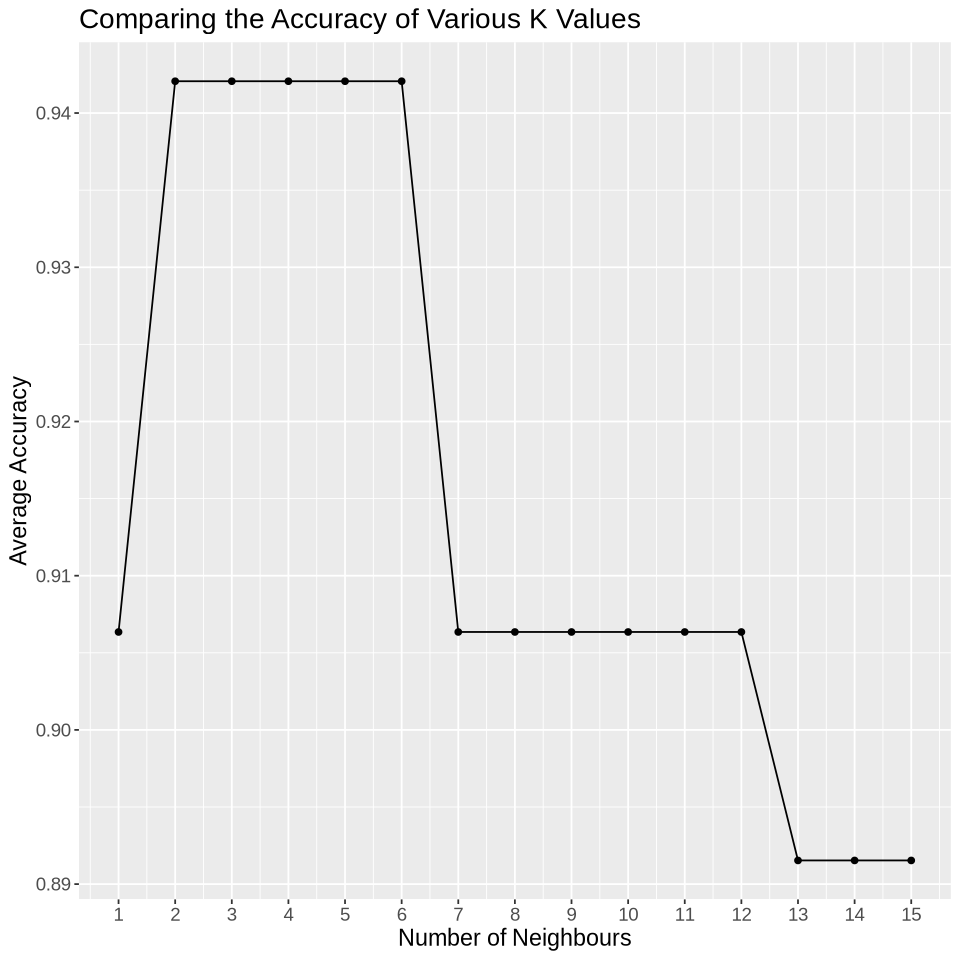

In [42]:
set.seed(1)

plaicraft_split <- initial_split(plaicraft, prop = 0.7, strata = much_time_)

plaicraft_train <- training(plaicraft_split)

plaicraft_test <- testing(plaicraft_split)

recipe <- recipe(much_time_ ~ experience, data = plaicraft_train) |>
        step_upsample(much_time_, over_ratio = 1, skip = TRUE) 

test_ks <- tibble(neighbors = seq(from = 1, to = 15, by = 1))

vfold <- vfold_cv(plaicraft_train, v = 5, strata = much_time_)

spec_1 <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
        set_engine("kknn") |>
        set_mode("classification")

workflow_1 <- workflow() |>
        add_recipe(recipe) |>
        add_model(spec_1) |>
        tune_grid(resamples = vfold, grid = test_ks) |>
        collect_metrics(truth = much_time_, control = "FALSE") |>
        filter(.metric == "accuracy")

options(repr.plot.width = 8, repr.plot.height = 8)
k_plot_1 <- ggplot(workflow_1, aes(x = neighbors, y = mean)) +
        geom_point() +
        geom_line() +
        labs(x = "Number of Neighbours", y = "Average Accuracy", 
             title = "Comparing the Accuracy of Various K Values") +
        scale_x_continuous(breaks = seq(1,15, by = 1)) +
        theme(text = element_text(size = 14))
k_plot_1

In [37]:
workflow_1

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.9063492,5,0.04987036,Preprocessor1_Model01
2,accuracy,binary,0.9420635,5,0.01824438,Preprocessor1_Model02
3,accuracy,binary,0.9420635,5,0.01824438,Preprocessor1_Model03
4,accuracy,binary,0.9420635,5,0.01824438,Preprocessor1_Model04
5,accuracy,binary,0.9420635,5,0.01824438,Preprocessor1_Model05
6,accuracy,binary,0.9420635,5,0.01824438,Preprocessor1_Model06
7,accuracy,binary,0.9063492,5,0.04987036,Preprocessor1_Model07
8,accuracy,binary,0.9063492,5,0.04987036,Preprocessor1_Model08
9,accuracy,binary,0.9063492,5,0.04987036,Preprocessor1_Model09


→ A | warning: No control observations were detected in `truth` with control level 'TRUE'.

There were issues with some computations   A: x1

There were issues with some computations   A: x1





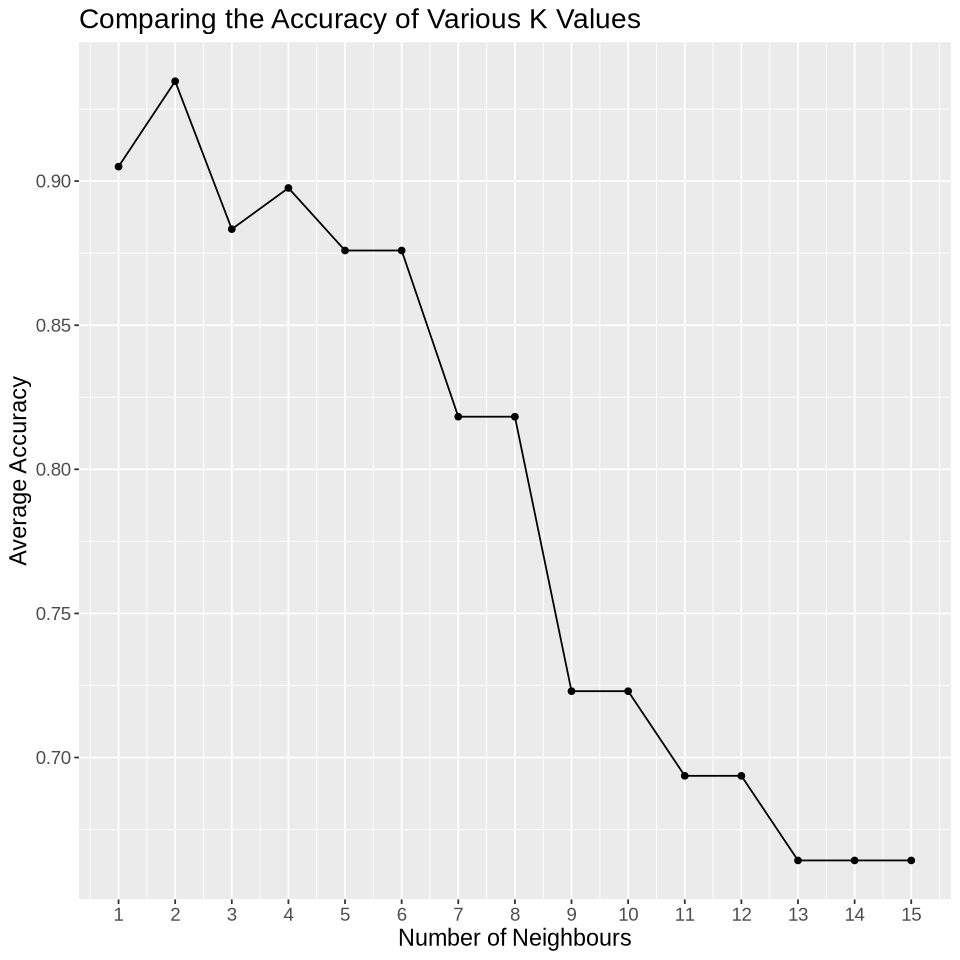

In [33]:
set.seed(1)

recipe_age <- recipe(much_time_ ~ age + experience, data = plaicraft_train) |>
         step_upsample(much_time_, over_ratio = 1, skip = TRUE) |>
         step_scale(age) |>
         step_center(age)

workflow_2 <- workflow() |>
        add_recipe(recipe_age) |>
        add_model(spec_1) |>
        tune_grid(resamples = vfold, grid = test_ks) |>
        collect_metrics() |>
        filter(.metric == "accuracy")

options(repr.plot.width = 8, repr.plot.height = 8)
k_plot_2 <- ggplot(workflow_2, aes(x = neighbors, y = mean)) +
        geom_point() +
        geom_line() +
        labs(x = "Number of Neighbours", y = "Average Accuracy", 
             title = "Comparing the Accuracy of Various K Values") +
        scale_x_continuous(breaks = seq(1,15, by = 1)) +
        theme(text = element_text(size = 14))
k_plot_2

In [34]:
workflow_2

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.9050265,5,0.01483842,Preprocessor1_Model01
2,accuracy,binary,0.9346561,5,0.01315855,Preprocessor1_Model02
3,accuracy,binary,0.8833333,5,0.02910774,Preprocessor1_Model03
4,accuracy,binary,0.8976190,5,0.02468128,Preprocessor1_Model04
5,accuracy,binary,0.8759259,5,0.03399857,Preprocessor1_Model05
6,accuracy,binary,0.8759259,5,0.03399857,Preprocessor1_Model06
7,accuracy,binary,0.8182540,5,0.04039831,Preprocessor1_Model07
8,accuracy,binary,0.8182540,5,0.04039831,Preprocessor1_Model08
9,accuracy,binary,0.7230159,5,0.06515890,Preprocessor1_Model09


In [35]:
workflow_1 |>
    summarize(max = max(mean))

workflow_2 |>
    summarize(max = max(mean))

max
<dbl>
0.9420635


max
<dbl>
0.9346561


In [41]:
set.seed(1)

spec_1.1 <- nearest_neighbor(weight_func = "rectangular", neighbors = 4) |>
        set_engine("kknn") |>
        set_mode("classification")

workflow_1.1 <- workflow() |>
        add_recipe(recipe) |>
        add_model(spec_1.1) |>
        fit(data = plaicraft_train)

test_predictions <- predict(workflow_1.1, plaicraft_test) |>
  bind_cols(plaicraft_test)

test_predictions |>
  metrics(truth = much_time_, estimate = .pred_class) |>
  filter(.metric == "accuracy")
head(test_predictions)


confusion_matrix <- test_predictions |>
             conf_mat(truth = much_time_, estimate = .pred_class)
confusion_matrix

# test_predictions |>
#         precision(truth = much_time_, estimate = .pred_class)

# test_predictions |>
#         recall(truth = much_time_, estimate = .pred_class)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8135593


.pred_class,experience,played_hours,gender,age,hashedEmail,much_time_
<fct>,<fct>,<dbl>,<fct>,<dbl>,<chr>,<fct>
FALSE,Veteran,0.0,Male,17,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,FALSE
FALSE,Amateur,0.7,Female,21,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,FALSE
FALSE,Regular,0.1,Male,21,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,FALSE
FALSE,Amateur,0.0,Female,17,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,FALSE
FALSE,Amateur,0.0,Male,21,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,FALSE
FALSE,Amateur,0.1,Male,17,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,FALSE


          Truth
Prediction FALSE TRUE
     FALSE    48   11
     TRUE      0    0

In [ ]:
new_obs_1 <- tibble(played_hours = 100, session_amount = 200, age = 18, much_time_3 = 2)

new_obs_2 <- tibble(played_hours = 0.5, session_amount = 2, age = 20, much_time_3 = 1)

spec_1.1 <- nearest_neighbor(weight_func = "rectangular", neighbors = 14) |>
        set_engine("kknn") |>
        set_mode("classification")

workflow_1.1 <- workflow() |>
        add_recipe(recipe) |>
        add_model(spec_1.1) |>
        fit(data = plaicraft_train)

predicted_1 <- predict(workflow_1.1, new_obs_1)
predicted_1

predicted_2 <- predict(workflow_1.1, new_obs_2)
predicted_2